# 📊 Modélisation avec Random Forest et Gradient Boosting

In [5]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("../Data/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 🎯 Échantillonnage stratifié (20 000 lignes)

In [6]:
# Stratified sampling to preserve class distribution
sample_size = 20000
df_sampled = df.groupby("Diabetes_012", group_keys=False).apply(
    lambda x: x.sample(min(len(x), sample_size // 3), random_state=42)
).reset_index(drop=True)

# Vérification de la distribution des classes
df_sampled['Diabetes_012'].value_counts(normalize=True)

C:\Users\0203163E\AppData\Local\Temp\ipykernel_33392\4291872787.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Diabetes_012", group_keys=False).apply(


Diabetes_012
0.0    0.371096
2.0    0.371096
1.0    0.257808
Name: proportion, dtype: float64

## 🧹 Préparation des données

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer X et y
X = df_sampled.drop("Diabetes_012", axis=1)
y = df_sampled["Diabetes_012"]

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🚀 Entraînement des modèles

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialisation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraînement
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## 📈 Évaluation des performances

In [9]:
from sklearn.metrics import classification_report

# Prédictions
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Rapport de classification
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Random Forest:
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.64      1334
         1.0       0.33      0.17      0.23       926
         2.0       0.53      0.68      0.60      1333

    accuracy                           0.54      3593
   macro avg       0.50      0.50      0.49      3593
weighted avg       0.52      0.54      0.52      3593


Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66      1334
         1.0       0.39      0.09      0.15       926
         2.0       0.54      0.76      0.63      1333

    accuracy                           0.57      3593
   macro avg       0.52      0.52      0.48      3593
weighted avg       0.53      0.57      0.52      3593



## 🔍 Matrice de confusion (Random Forest)

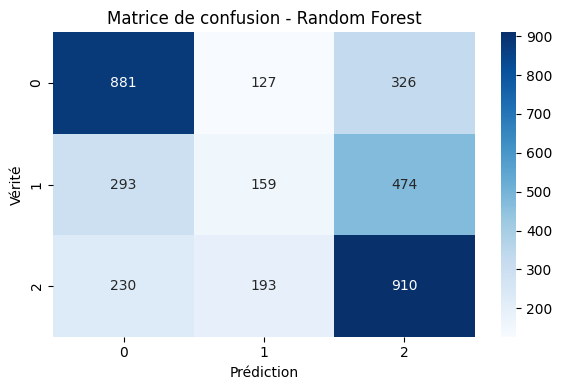

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.tight_layout()
plt.show()

## 🔬 Importance des variables

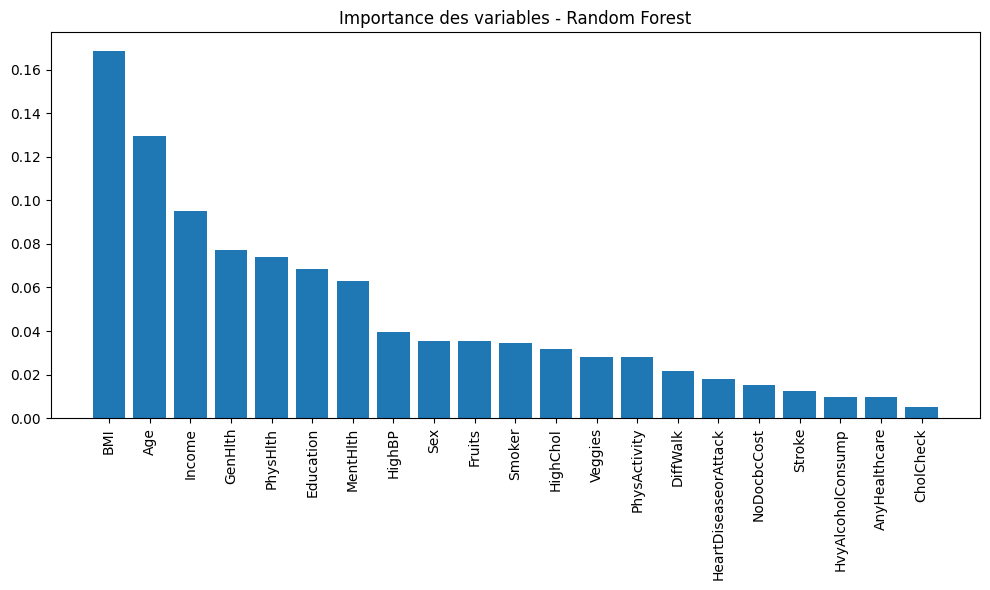

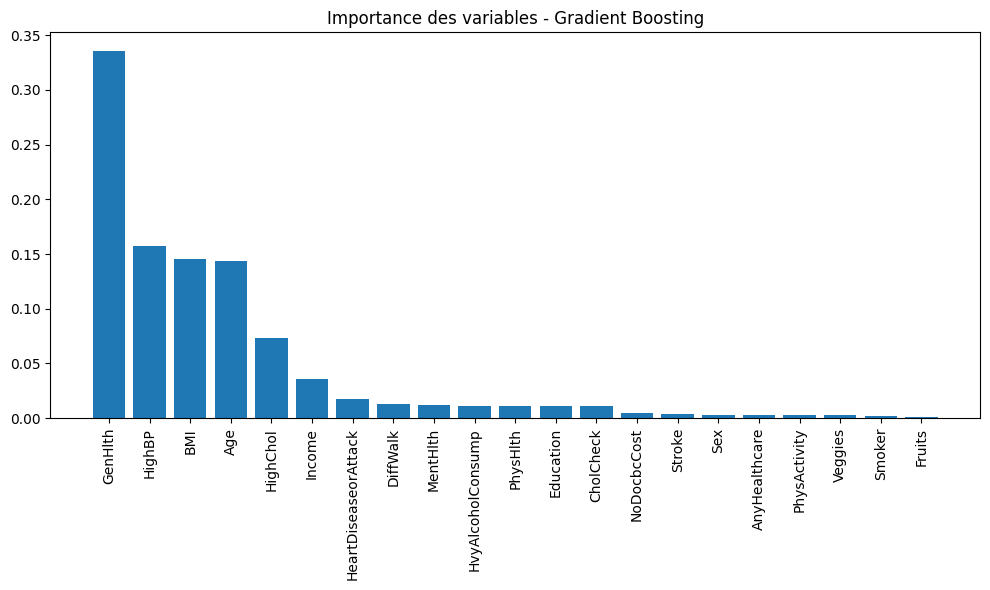

In [11]:
import numpy as np

# Importance Random Forest
importances_rf = rf.feature_importances_
features = X.columns
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances_rf[indices_rf], align='center')
plt.xticks(range(len(features)), features[indices_rf], rotation=90)
plt.title("Importance des variables - Random Forest")
plt.tight_layout()
plt.show()

# Importance Gradient Boosting
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances_gb[indices_gb], align='center')
plt.xticks(range(len(features)), features[indices_gb], rotation=90)
plt.title("Importance des variables - Gradient Boosting")
plt.tight_layout()
plt.show()

## 🧠 Explications
- On charge le dataset et on réalise un **échantillonnage stratifié**.
- On sépare les variables explicatives et la cible.
- On **standardise** les variables (utile pour certains modèles).
- On entraîne deux modèles puissants : **Random Forest** et **Gradient Boosting**.
- On évalue les modèles avec un **rapport de classification** et une **matrice de confusion**.
- On visualise les **variables les plus importantes** pour la prédiction.